In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from pyDeepInsight import ImageTransformer
from pyDeepInsight.utils import Norm2Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

<h1> importando dataframe </h1>

In [2]:
df = pd.read_csv('../datassets/CIC-IDS-2018-Dataset/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')

<h3> caracteristicas </h3>

In [4]:
df.dtypes

Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max         float64
Idle Min         float64
Label             object
Length: 80, dtype: object

In [5]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.423429e+03,8.049848e+00,1.151421e+07,5.887282e+00,6.983180e+00,3.920838e+02,5.271275e+03,2.104312e+02,8.249200e+00,5.461640e+01,...,2.044231e+00,1.745403e+01,1.229579e+05,6.130972e+04,1.905231e+05,8.305446e+04,4.781197e+06,1.064224e+05,4.863777e+06,4.677017e+06
std,1.516176e+04,4.432629e+00,3.012113e+07,8.903317e+01,2.129580e+02,2.159779e+03,3.088768e+05,2.669497e+02,2.094972e+01,5.762840e+01,...,1.392463e+01,5.179526e+00,2.083099e+06,1.261694e+06,2.761456e+06,1.759832e+06,1.741308e+07,1.462605e+06,1.756808e+07,1.733303e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,5.160000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.389000e+03,6.000000e+00,1.124200e+04,3.000000e+00,1.000000e+00,6.300000e+01,1.290000e+02,4.600000e+01,0.000000e+00,4.000000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.080000e+03,6.000000e+00,2.210150e+06,7.000000e+00,5.000000e+00,3.650000e+02,5.820000e+02,3.260000e+02,0.000000e+00,1.086667e+02,...,3.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.010000e+08,1.711000e+03,1.460000e+03,1.460000e+03,...,9.262000e+03,4.400000e+01,1.110000e+08,7.490000e+07,1.110000e+08,1.110000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


In [6]:
df.head(5)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
df.columns.tolist()

['Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd B

<h1> Tratando dataframe </h1>

In [81]:
df.replace(np.inf,np.NaN,inplace=True)
df.dropna(inplace=True)
df.Label = df.apply( lambda x: 0 if x.Label == 'Benign' else 1, axis=1)
df.drop(['Timestamp'],axis=1,inplace=True)
dfn = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [82]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.dtypes

Dst Port               int64
Protocol               int64
Flow Duration          int64
Tot Fwd Pkts           int64
Tot Bwd Pkts           int64
TotLen Fwd Pkts        int64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max        int64
Fwd Pkt Len Min        int64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max        int64
Bwd Pkt Len Min        int64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags          int64
Bwd PSH Flags          int64
Fwd URG Flags          int64
Bwd URG Flags 

In [83]:
x=df.iloc[:,:-1]
y=df['Label']

<h3> Verificando Tratamento </h3>

In [11]:
x.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1044525.0,1044525.0,1044525.0,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1044525.0,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1044525.0,1044525.0,1044525.0,1044525.0,1044525.0,1044525.0,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06
mean,8.266766e+03,8.057796e+00,1.155885e+07,5.902530e+00,7.010040e+00,3.935511e+02,5.291713e+03,2.111953e+02,8.273807e+00,5.479855e+01,7.823176e+01,3.484667e+02,1.949306e+01,1.031946e+02,1.261981e+02,1.958319e+05,1.985327e+04,4.276349e+06,7.104750e+05,6.350269e+06,3.955207e+06,1.128562e+07,4.514645e+06,7.706199e+05,6.173834e+06,4.035103e+06,6.307141e+06,5.372406e+05,6.376105e+05,1.921421e+06,1.281696e+05,2.912999e-02,0.0,0.0,0.0,1.240785e+02,1.450918e+02,1.742885e+04,2.424421e+03,8.135052e+00,3.818130e+02,7.436688e+01,1.154662e+02,3.608222e+04,3.355592e-03,2.912999e-02,2.654355e-01,4.588985e-01,3.322831e-01,3.047222e-02,0.0,2.654364e-01,4.812341e-01,8.406810e+01,5.479855e+01,1.031946e+02,0.0,0.0,0.0,0.0,0.0,0.0,5.902530e+00,3.935511e+02,7.010040e+00,5.291538e+03,6.946447e+03,1.127910e+04,2.052119e+00,1.744416e+01,1.234346e+05,6.154744e+04,1.912618e+05,8.337649e+04,4.799736e+06,1.068351e+05,4.882636e+06,4.695151e+06
std,1.496231e+04,4.439372e+00,3.017092e+07,8.920527e+01,2.133700e+02,2.163833e+03,3.094749e+05,2.671786e+02,2.098046e+01,5.765815e+01,9.701599e+01,5.042396e+02,4.553580e+01,1.662110e+02,1.950849e+02,3.081872e+06,1.720986e+05,1.680574e+07,2.978755e+06,1.899792e+07,1.681243e+07,3.005487e+07,1.687808e+07,3.380230e+06,1.886027e+07,1.688556e+07,2.353235e+07,2.608238e+06,2.727316e+06,8.417121e+06,2.051691e+06,1.681709e-01,0.0,0.0,0.0,3.909482e+03,4.249834e+03,1.624415e+05,3.846068e+04,1.927289e+01,4.961310e+02,1.078728e+02,1.508304e+02,7.510190e+04,5.783023e-02,1.681709e-01,4.415650e-01,4.983080e-01,4.710321e-01,1.718828e-01,0.0,4.415655e-01,8.305182e-01,1.119633e+02,5.765815e+01,1.662110e+02,0.0,0.0,0.0,0.0,0.0,0.0,8.920527e+01,2.163833e+03,2.133700e+02,3.093639e+05,1.274966e+04,2.370387e+04,1.395102e+01,5.187126e+00,2.087119e+06,1.264132e+06,2.766778e+06,1.763232e+06,1.744425e+07,1.465423e+06,1.759949e+07,1.736415e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,

In [12]:
xnn = x
x = MaxAbsScaler().fit_transform(xnn)

In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
x.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [74]:
y.head(4)

0    0
1    0
2    0
3    0
Name: Label, dtype: int64

In [75]:
y.dtypes

dtype('int64')

In [84]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

<h1> Treinando Modelos </h1>

<h3>Knn</h3>

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
knnPred = knn.predict(X=x)
accuracy_score(knnPred, y)

: 

<h3>Dt</h3>

In [30]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

0.9999680876186343

In [22]:
dt = DecisionTreeClassifier(min_samples_split=5)
dt.fit(x, y)
dtPred = dt.predict(x)
accuracy_score(y, dtPred)

0.9999990426270314

In [24]:
dt = DecisionTreeClassifier(min_samples_split=3)
dt.fit(x, y)
dtPred = dt.predict(x)
accuracy_score(y, dtPred)

1.0

In [25]:
dt = DecisionTreeClassifier(min_samples_split=20)
dt.fit(x, y)
dtPred = dt.predict(x)
accuracy_score(y, dtPred)

0.99999329838922

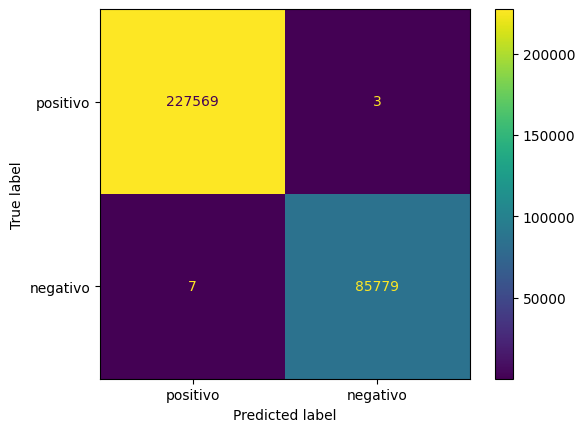

In [31]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [32]:
tp = dtmc[0][0]
fn = dtmc[0][1]
fp = dtmc[1][0]
tn = dtmc[1][1]

tpr = tp / (tp+fn)
tnr = tn / (tn+fp)
fnr = fn / (fn+tp)
frp = fp / (fp+tn)

tpr,tnr,fnr,frp

(0.9999868173589018,
 0.9999184016039914,
 1.3182641098201888e-05,
 8.159839600867274e-05)

<h3>Rf</h3>

In [39]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(treinoX, treinoY)
rfPred = rf.predict(testeX)
accuracy_score(testey, rfPred)

0.9995659916134262

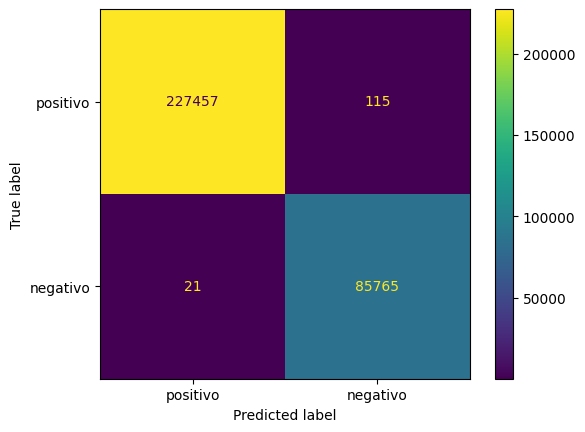

In [40]:
rfmc = confusion_matrix(testey, rfPred)
ConfusionMatrixDisplay(rfmc, display_labels=['positivo', 'negativo']).plot()

In [42]:
tp = rfmc[0][0]
fn = rfmc[0][1]
fp = rfmc[1][0]
tn = rfmc[1][1]

tpr = tp / (tp+fn)
tnr = tn / (tn+fp)
fnr = fn / (fn+tp)
frp = fp / (fp+tn)

tpr,tnr,fnr,frp

(0.9994946654245689,
 0.999755204811974,
 0.0005053345754310723,
 0.0002447951880260182)

<h3>Extra Tree Classifier</h3>

In [47]:
etc = ExtraTreesClassifier(criterion="entropy", verbose=1)
etcModel = etc.fit(treinoX, treinoY)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   44.0s


In [48]:
etcPred = etcModel.predict(testeX)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


In [49]:
accuracy_score(etcPred, testey)

0.9999904262855903

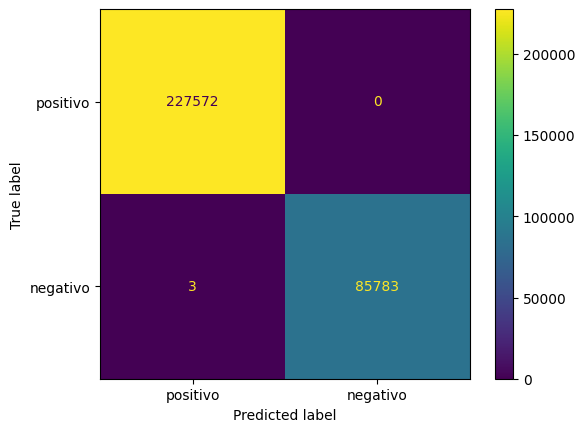

In [50]:
etcmc = confusion_matrix(testey, etcPred)
ConfusionMatrixDisplay(etcmc, display_labels=['positivo', 'negativo']).plot()

In [51]:
tp = etcmc[0][0]
fn = etcmc[0][1]
fp = etcmc[1][0]
tn = etcmc[1][1]

tpr = tp / (tp+fn)
tnr = tn / (tn+fp)
fnr = fn / (fn+tp)
frp = fp / (fp+tn)

tpr,tnr,fnr,frp

(1.0, 0.9999650292588534, 0.0, 3.4970741146574036e-05)

Precisão de 100% nos teste, overfiting!

<h2>Deep learning</h2>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

2023-10-11 10:27:57.021752: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 10:27:57.134358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 10:27:57.136618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 10:27:59.987633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [135]:
x_train = treinoX[0:10000]
y_train = treinoY[0:10000]
x_train = x_train.astype('float32')
x_test = testeX.astype('float32')
x_train /= 255
x_test /= 255

In [136]:
x_train = np.array(x_train)
x_test = np.array(x_test)


In [137]:
empty_array = np.zeros((10000, 28, 28, 1))
empty_array2 = np.zeros((10000, 28, 28, 1))


In [143]:
i = 0
for ln in range(10000):
    for cln in range(76):
            try:
                empty_array[ln][cln][0][0] = x_train[ln][cln]
            except:
                cln = 
                empty_array[ln][cln-28][1][0] = x_train[ln][cln]
            finally:
                cln 
                empty_array[ln][cln-56][2][0] = x_train[ln][cln]

IndexError: index -56 is out of bounds for axis 0 with size 28

In [110]:
i = 0
for ln in range(10000):
    for cln in range(76):
            try:
                empty_array2[ln][cln][0][0] = x_train[ln][cln]
            except:
                empty_array2[ln][cln -28][1][0] = x_train[ln][cln]
            finally:
                empty_array2[ln][cln -56][2][0] = x_train[ln][cln]



In [111]:
x_train = empty_array2
x_test = empty_array

In [99]:
x_train[0]

array([[[ 0.        ],
        [ 0.        ],
        [ 0.74117649],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [-0.00392157],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [

In [114]:
y_train = keras.utils.to_categorical(y_train, 10)
y_teste = keras.utils.to_categorical(testey, 10)

In [115]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [116]:
treino = model.fit(x_train, y_train, batch_size=32, epochs=30, verbose=1, validation_split=0.3)

Epoch 1/30
219/219 [==============================] - 15s 64ms/step - loss: 418.2760 - accuracy: 0.6401 - val_loss: 108.9160 - val_accuracy: 0.6173
Epoch 2/30
219/219 [==============================] - 13s 60ms/step - loss: 268.1889 - accuracy: 0.6539 - val_loss: 4.9219 - val_accuracy: 0.7127
Epoch 3/30
219/219 [==============================] - 13s 61ms/step - loss: 182.9701 - accuracy: 0.6703 - val_loss: 5.3373 - val_accuracy: 0.7127
Epoch 4/30
219/219 [==============================] - 14s 63ms/step - loss: 125.8725 - accuracy: 0.6807 - val_loss: 5.6794 - val_accuracy: 0.7127
Epoch 5/30
219/219 [==============================] - 13s 61ms/step - loss: 92.1164 - accuracy: 0.6921 - val_loss: 5.9839 - val_accuracy: 0.7127
Epoch 6/30
219/219 [==============================] - 13s 61ms/step - loss: 62.2129 - accuracy: 0.7049 - val_loss: 6.1886 - val_accuracy: 0.7127
Epoch 7/30
219/219 [==============================] - 13s 61ms/step - loss: 50.0605 - accuracy: 0.7069 - val_loss: 6.3728 - 

In [117]:
treino.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [1]:
treino.acc

NameError: name 'treino' is not defined

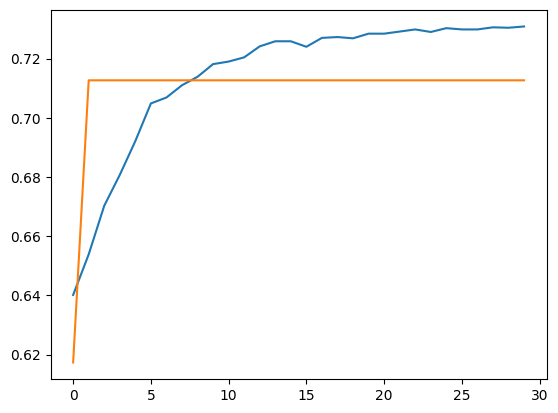

In [118]:
plt.plot(treino.history['accuracy'])
plt.plot(treino.history['val_accuracy'])

In [129]:
predi = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [130]:
predicted_classes = np.argmax(predi, axis=1)

In [131]:
predi

array([[0.6943348 , 0.2039562 , 0.01349039, ..., 0.00978229, 0.01694293,
        0.02403816],
       [0.6943348 , 0.2039562 , 0.01349039, ..., 0.00978229, 0.01694293,
        0.02403816],
       [0.6943348 , 0.2039562 , 0.01349039, ..., 0.00978229, 0.01694293,
        0.02403816],
       ...,
       [0.6943348 , 0.2039562 , 0.01349039, ..., 0.00978229, 0.01694293,
        0.02403816],
       [0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6943348 , 0.2039562 , 0.01349039, ..., 0.00978229, 0.01694293,
        0.02403816]], dtype=float32)

In [132]:
y_test2 = np.argmax(y_teste, axis=1 )

In [134]:
accuracy_score(y_test2, predi)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets